# Model testing and validation

This notebook will test and validate all implemented models (e.g., the gradient_descent optimizer and LogisticRegression) using a small synthetic 2‑feature classification dataset.

- Objectives: train models, evaluate performance, and visualize decision boundaries.
- Steps included: data loading → model instantiation → training (fit) → evaluation on training set (predictions, accuracy) → visualization → evaluation on test set.
- Metrics & checks: accuracy (add confusion matrix / precision/recall if needed), decision-boundary plots, and test predictions.
- Reproducibility: set random seeds where applicable and run cells in order.

In [2]:
# Imports 
# Standard library imports
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Local application imports
from gradient_descent.gradient_descent import *
from logistic_regression.logistic_regression import *
from linear_regression.linear_regression import *
from knn.knn import *
from Naive_bayes.naive_bayes import *

--- 
# Lets first test the Logistic Regression

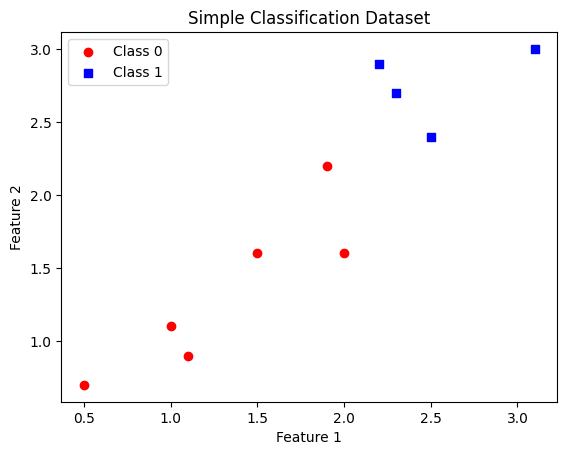

In [3]:
# creating simple classification dataset

df = pd.DataFrame({
    'feature1': [2.5, 0.5, 2.2, 1.9, 3.1, 2.3, 2, 1, 1.5, 1.1],
    'feature2': [2.4, 0.7, 2.9, 2.2, 3, 2.7, 1.6, 1.1, 1.6, 0.9],
    'label':    [1, 0, 1, 0, 1, 1, 0, 0, 0, 0]
})

# creating testing data
X_test = pd.DataFrame({
    'feature1': [1.0, 2.0, 3.0],
    'feature2': [1.0, 2.0, 3.0]
})

y_test = pd.Series([0, 0, 1])


X = df[['feature1', 'feature2']].values
y = df['label'].values

# visualizing the two classes

plt.scatter(X[y == 0, 0], X[y == 0, 1], c='red', marker='o', label='Class 0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], c='blue', marker='s', label='Class 1')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title('Simple Classification Dataset')
plt.show()

In [4]:
# optimizer
gradient_descent = gradient_descent(learning_rate=0.1)


# model
logistic_regression = LogisticRegression(optimizer=gradient_descent, cost_function='binary_crossentropy')

In [5]:
# fitting the logistic regression model
logistic_regression.fit(X, y, epochs=1500)

Fitting the model using <gradient_descent.gradient_descent.gradient_descent object at 0x767f8c6555e0> with binary_crossentropy cost function.
Performing Gradient Descent for 1500 epochs.
Epoch 1/1500
Epoch 2/1500
Epoch 3/1500
Epoch 4/1500
Epoch 5/1500
Epoch 6/1500
Epoch 7/1500
Epoch 8/1500
Epoch 9/1500
Epoch 10/1500
Epoch 11/1500
Epoch 12/1500
Epoch 13/1500
Epoch 14/1500
Epoch 15/1500
Epoch 16/1500
Epoch 17/1500
Epoch 18/1500
Epoch 19/1500
Epoch 20/1500
Epoch 21/1500
Epoch 22/1500
Epoch 23/1500
Epoch 24/1500
Epoch 25/1500
Epoch 26/1500
Epoch 27/1500
Epoch 28/1500
Epoch 29/1500
Epoch 30/1500
Epoch 31/1500
Epoch 32/1500
Epoch 33/1500
Epoch 34/1500
Epoch 35/1500
Epoch 36/1500
Epoch 37/1500
Epoch 38/1500
Epoch 39/1500
Epoch 40/1500
Epoch 41/1500
Epoch 42/1500
Epoch 43/1500
Epoch 44/1500
Epoch 45/1500
Epoch 46/1500
Epoch 47/1500
Epoch 48/1500
Epoch 49/1500
Epoch 50/1500
Epoch 51/1500
Epoch 52/1500
Epoch 53/1500
Epoch 54/1500
Epoch 55/1500
Epoch 56/1500
Epoch 57/1500
Epoch 58/1500
Epoch 59/1

array([-6.97082172,  0.67755106,  2.56731267])

Predictions: [1 0 1 0 1 1 0 0 0 0]
Accuracy: 1.0


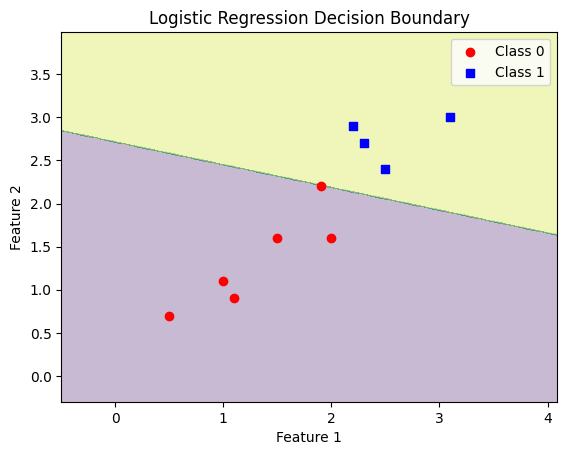

In [6]:
# evaluating the model
predictions = logistic_regression.predict(X)
print("Predictions:", predictions)

accuracy = np.mean(predictions == y)
print("Accuracy:", accuracy)

# plotting decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
Z = logistic_regression.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X[y == 0, 0], X[y == 0, 1], c='red', marker='o', label='Class 0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], c='blue', marker='s', label='Class 1')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title('Logistic Regression Decision Boundary')
plt.show()

Test Predictions: [0 0 1]
Test Actual Labels: [0 0 1]


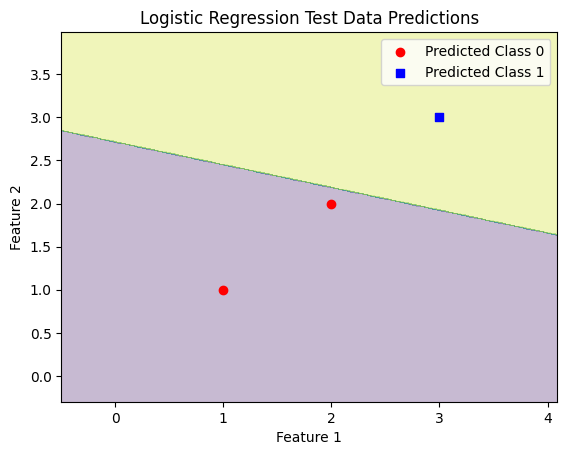

In [7]:
# evaluating on test data
test_predictions = logistic_regression.predict(X_test.values)
print("Test Predictions:", test_predictions)
print("Test Actual Labels:", y_test.values)

# plotting test data predictions with decision boundary
Z_test = logistic_regression.predict(np.c_[xx.ravel(), yy.ravel()])
Z_test = Z_test.reshape(xx.shape)
plt.contourf(xx, yy, Z_test, alpha=0.3)
plt.scatter(X_test.values[test_predictions == 0, 0], X_test.values[test_predictions == 0, 1], c='red', marker='o', label='Predicted Class 0')
plt.scatter(X_test.values[test_predictions == 1, 0], X_test.values[test_predictions == 1, 1], c='blue', marker='s', label='Predicted Class 1')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title('Logistic Regression Test Data Predictions')
plt.show()

---
# Linear Regression

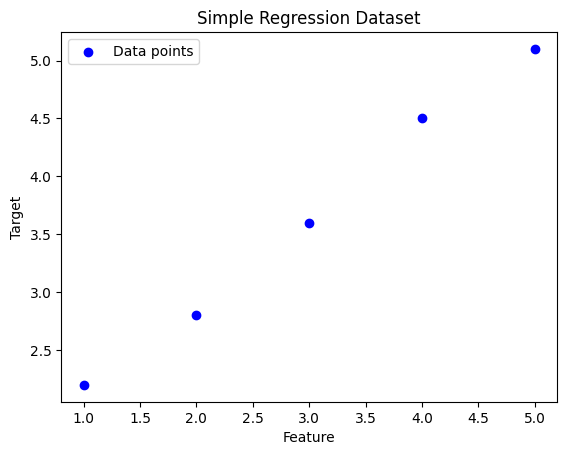

In [8]:
# creating simple regression dataset
df_reg = pd.DataFrame({
    'feature': [1, 2, 3, 4, 5],
    'target':  [2.2, 2.8, 3.6, 4.5, 5.1]
})
X_reg = df_reg[['feature']].values
y_reg = df_reg['target'].values

X_test_reg = pd.DataFrame({
    'feature': [1.5, 2.5, 3.5]
}).values
y_test_reg = pd.Series([2.5, 3.2, 4.0]).values

# visualizing the regression dataset
plt.scatter(X_reg, y_reg, c='blue', marker='o', label='Data points')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('Simple Regression Dataset')
plt.legend()
plt.show()



In [9]:
# optimizer
# `gradient_descent` is already an instance in this notebook, so call its class to create a new instance.
gradient_descent_reg = gradient_descent.__class__(learning_rate=0.01)

# model
linear_regression = linear_regression(optimizer=gradient_descent_reg, cost_function='MSE')

In [10]:
# fitting the model
linear_regression.fit(X_reg, y_reg, epochs=1000)

Fitting the model using <gradient_descent.gradient_descent.gradient_descent object at 0x767f8c222ba0> with MSE cost function.
Performing Gradient Descent for 1000 epochs.
Epoch 1/1000
Epoch 2/1000
Epoch 3/1000
Epoch 4/1000
Epoch 5/1000
Epoch 6/1000
Epoch 7/1000
Epoch 8/1000
Epoch 9/1000
Epoch 10/1000
Epoch 11/1000
Epoch 12/1000
Epoch 13/1000
Epoch 14/1000
Epoch 15/1000
Epoch 16/1000
Epoch 17/1000
Epoch 18/1000
Epoch 19/1000
Epoch 20/1000
Epoch 21/1000
Epoch 22/1000
Epoch 23/1000
Epoch 24/1000
Epoch 25/1000
Epoch 26/1000
Epoch 27/1000
Epoch 28/1000
Epoch 29/1000
Epoch 30/1000
Epoch 31/1000
Epoch 32/1000
Epoch 33/1000
Epoch 34/1000
Epoch 35/1000
Epoch 36/1000
Epoch 37/1000
Epoch 38/1000
Epoch 39/1000
Epoch 40/1000
Epoch 41/1000
Epoch 42/1000
Epoch 43/1000
Epoch 44/1000
Epoch 45/1000
Epoch 46/1000
Epoch 47/1000
Epoch 48/1000
Epoch 49/1000
Epoch 50/1000
Epoch 51/1000
Epoch 52/1000
Epoch 53/1000
Epoch 54/1000
Epoch 55/1000
Epoch 56/1000
Epoch 57/1000
Epoch 58/1000
Epoch 59/1000
Epoch 60/100

array([1.35286444, 0.76028595])

Predictions: [2.1131504  2.87343635 3.6337223  4.39400826 5.15429421]
Train MSE: 0.005651011138877877
Test Predictions: [2.49329337 3.25357933 4.01386528]
Test Actual Targets: [2.5 3.2 4. ]


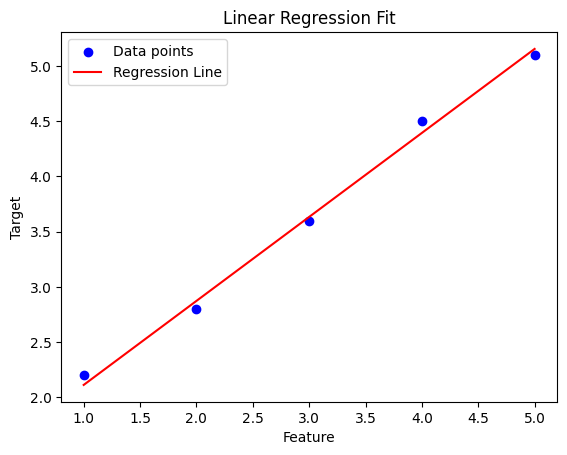

In [11]:
# evaluating the model
# use the regression input (X_reg) instead of the classification input (X)
predictions = linear_regression.predict(X_reg)
print("Predictions:", predictions)

# compute and print training MSE for the regression model
mse_train = np.mean((predictions - y_reg) ** 2)
print("Train MSE:", mse_train)

# evaluating on test data
test_predictions = linear_regression.predict(X_test_reg)
print("Test Predictions:", test_predictions)
print("Test Actual Targets:", y_test_reg)


#plotting the regression line
plt.scatter(X_reg, y_reg, c='blue', marker='o', label='Data points')
plt.plot(X_reg, predictions, color='red', label='Regression Line')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('Linear Regression Fit')
plt.legend()
plt.show()

---
# KNN

In [12]:
# lets work on the same classification dataset with KNN
X_knn = X
y_knn = y

X_test_knn = X_test.values
y_test_knn = y_test.values

In [13]:
# model
knn = knn(k_neighbors=3)

In [14]:
# fitting the model
knn.fit(X_knn, y_knn)

Predictions: [1 0 1 0 1 1 0 0 0 0]
Accuracy: 1.0
Test Predictions: [0 0 1]
Test Actual Labels: [0 0 1]


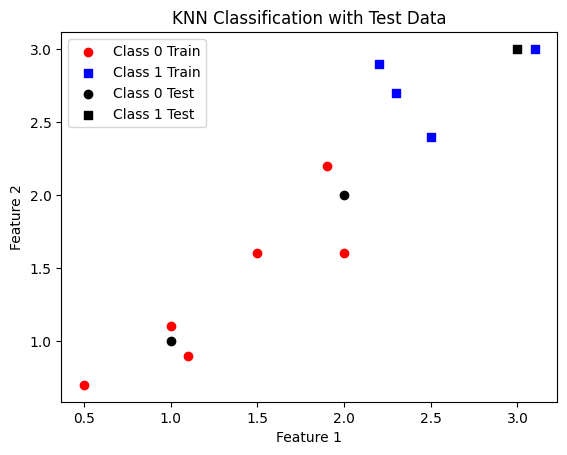

In [15]:
# evaluating the model
predictions = knn.predict(X_knn)
print("Predictions:", predictions)
accuracy = np.mean(predictions == y_knn)
print("Accuracy:", accuracy)

# evaluating on test data
test_predictions = knn.predict(X_test_knn)
print("Test Predictions:", test_predictions)
print("Test Actual Labels:", y_test_knn)

# plotting both classes with training data blue and test data orange
plt.scatter(X_knn[y_knn == 0, 0], X_knn[y_knn == 0, 1], c='red', marker='o', label='Class 0 Train')
plt.scatter(X_knn[y_knn == 1, 0], X_knn[y_knn == 1, 1], c='blue', marker='s', label='Class 1 Train')
plt.scatter(X_test_knn[test_predictions == 0, 0], X_test_knn[test_predictions == 0, 1], c='black', marker='o', label='Class 0 Test')
plt.scatter(X_test_knn[test_predictions == 1, 0], X_test_knn[test_predictions == 1, 1], c='black', marker='s', label='Class 1 Test')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title('KNN Classification with Test Data')
plt.show()

--- 
# Naive Bayes

In [17]:
# Naive Bayes on the same classification dataset
X_nb = X
y_nb = y

X_test_nb = X_test.values
y_test_nb = y_test.values

In [18]:
# model
naive_bayes = naive_bayes(alpha=1.0)

In [19]:
# fitting the model
naive_bayes.fit(X_nb, y_nb)

Predictions: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Accuracy: 0.6
Test Predictions: [0. 0. 0.]
Test Actual Labels: [0 0 1]


/home/joo/projects/Machine Learning from scratch/Naive_bayes/naive_bayes.py:34: RuntimeWarning: invalid value encountered in log
  log_likelihoods_neg = np.log(1 - self.likelihoods)


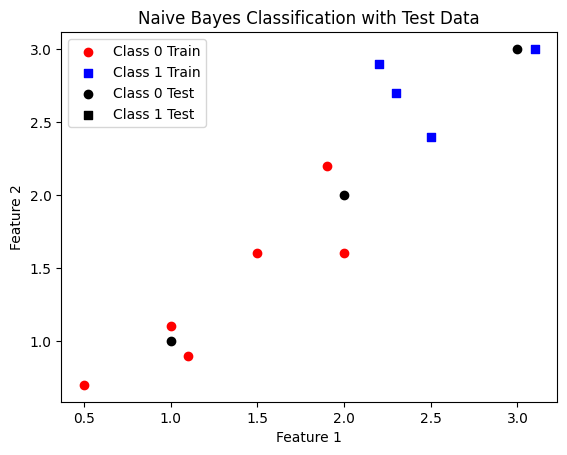

In [20]:
# evaluating the model
predictions = naive_bayes.predict(X_nb)
print("Predictions:", predictions)
accuracy = np.mean(predictions == y_nb)
print("Accuracy:", accuracy)

# evaluating on test data
test_predictions = naive_bayes.predict(X_test_nb)
print("Test Predictions:", test_predictions)
print("Test Actual Labels:", y_test_nb)

# plotting both classes with training data blue and test data orange
plt.scatter(X_nb[y_nb == 0, 0], X_nb[y_nb == 0, 1], c='red', marker='o', label='Class 0 Train')
plt.scatter(X_nb[y_nb == 1, 0], X_nb[y_nb == 1, 1], c='blue', marker='s', label='Class 1 Train')
plt.scatter(X_test_nb[test_predictions == 0, 0], X_test_nb[test_predictions == 0, 1], c='black', marker='o', label='Class 0 Test')
plt.scatter(X_test_nb[test_predictions == 1, 0], X_test_nb[test_predictions == 1, 1], c='black', marker='s', label='Class 1 Test')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title('Naive Bayes Classification with Test Data')
plt.show()